In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('USD_INR.csv')

In [3]:
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

,Price,Open,High,Low,Change %
Date,,,,,
2017-08-10,64.165,63.898,64.175,63.855,0.48
2017-08-09,63.860,63.780,63.860,63.710,0.26
2017-08-08,63.692,63.750,63.785,63.615,-0.23
2017-08-07,63.840,63.710,63.865,63.648,0.26
2017-08-04,63.675,63.670,63.786,63.572,-0.05


In [4]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

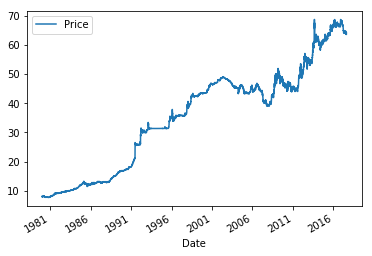

In [5]:
data = df_idx[['Price']]
data.plot(y='Price')

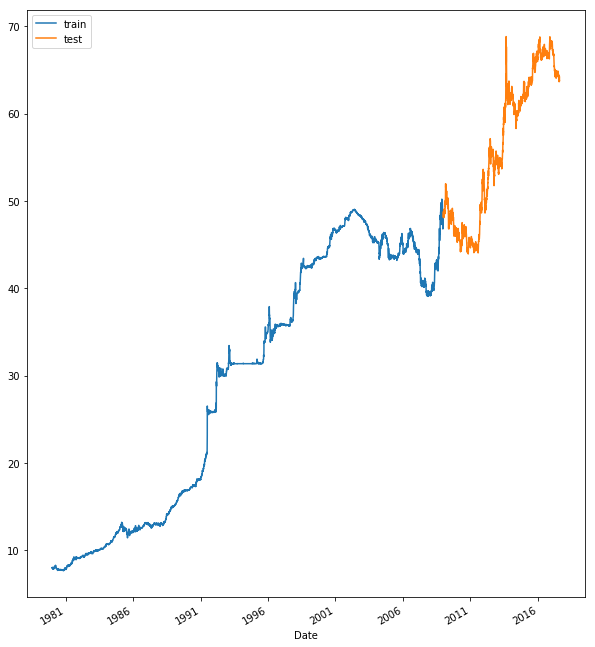

In [6]:
split_date = pd.Timestamp('01-01-2009')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [12]:
train_X = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
test_X = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding
import tensorflow.keras.backend as K

In [9]:
X_train.shape[0]

7451

In [15]:
train_X.shape

(7451, 1, 1)

In [36]:
K.clear_session()
model = Sequential()
model.add(LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2]), activation='relu'))
model.add(Dense(10, activation='relu'))

In [37]:
model.add(Dense(1, activation='relu'))
# model.add(LSTM(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))

In [38]:
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [39]:
model.fit(train_X, y_train, batch_size=1, epochs=10)

Epoch 1/10
7451/7451 [==============================] - 20s 3ms/step - loss: 0.0058
Epoch 2/10
7451/7451 [==============================] - 19s 3ms/step - loss: 3.6987e-05
Epoch 3/10
7451/7451 [==============================] - 20s 3ms/step - loss: 3.1762e-05
Epoch 4/10
7451/7451 [==============================] - 18s 2ms/step - loss: 2.8515e-05
Epoch 5/10
7451/7451 [==============================] - 17s 2ms/step - loss: 2.5922e-05
Epoch 6/10
7451/7451 [==============================] - 17s 2ms/step - loss: 2.3207e-05
Epoch 7/10
7451/7451 [==============================] - 18s 2ms/step - loss: 2.2484e-05
Epoch 8/10
7451/7451 [==============================] - 17s 2ms/step - loss: 2.2122e-05
Epoch 9/10
7451/7451 [==============================] - 18s 2ms/step - loss: 2.1509e-05
Epoch 10/10
7451/7451 [==============================] - 18s 2ms/step - loss: 2.0601e-05


In [40]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


R-Squared: 0.998661


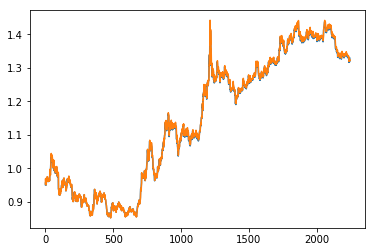

In [41]:
from sklearn.metrics import r2_score
y_pred = model.predict(test_X)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [33]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7451/7451 [==============================] - 1s 92us/step - loss: 2.6411e-05
Epoch 2/20
7451/7451 [==============================] - 0s 62us/step - loss: 1.9567e-05
Epoch 3/20
7451/7451 [==============================] - 0s 65us/step - loss: 2.5697e-05
Epoch 4/20
7451/7451 [==============================] - 0s 63us/step - loss: 2.2075e-05
Epoch 5/20
7451/7451 [==============================] - 0s 62us/step - loss: 2.0722e-05
Epoch 6/20
7451/7451 [==============================] - 0s 64us/step - loss: 3.0977e-05
Epoch 7/20
7451/7451 [==============================] - 0s 63us/step - loss: 2.3830e-05
Epoch 8/20
7451/7451 [==============================] - 0s 64us/step - loss: 1.5682e-05
Epoch 9/20
7451/7451 [==============================] - 0s 65us/step - loss: 1.8274e-05
Epoch 10/20
7451/7451 [==============================] - 0s 62us/step - loss: 1.9886e-05
Epoch 11/20
7451/7451 [==============================] - 0s 63us/step - loss: 1.7653e-05
Epoch 12/20
7451/7451 [=======

In [34]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________
None


R-Squared: 0.998816


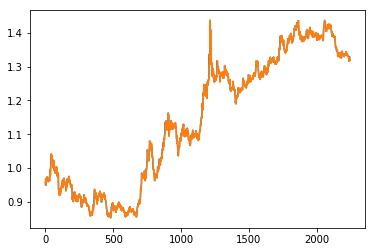

In [35]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))